# Spotify 2019 Top 50 Songs EDA

## Dataset Info
 [Kaggle: Top 50 Spotify Songs- 2019]('https://www.kaggle.com/leonardopena/top50spotify2019')
 - The owner of this dataset compiled their Spotify hisotry from [Organize Your Music]('http://organizeyourmusic.playlistmachinery.com')

### Column Descriptions

0. **Genre** - the genre of the track
1. **Beats Per Minute (BPM)** - The tempo of the song.
2. **Energy** - The energy of a song - the higher the value, the more energtic. song
3. **Danceability** - The higher the value, the easier it is to dance to this song.
4. **Loudness (dB)** - The higher the value, the louder the song.
5. **Liveness** - The higher the value, the more likely the song is a live recording.
6. **Valence** - The higher the value, the more positive mood for the song.
7. **Length** - The duration of the song.
8. **Acousticness** - The higher the value the more acoustic the song is.
9. **Speechiness** - The higher the value the more spoken word the song contains.
10. **Popularity** - The higher the value the more popular the song is.

### Question: Which artist had the most popular song? 
- *Note: If the artist is shown multiple times in the dataset, choose the most popular song*

## Import Libraries and Load CSV

In [1]:
 # import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline
from scipy import stats
from pandas_profiling import ProfileReport

In [2]:
top50 = pd.read_csv('2019top50.csv')

In [3]:
top50

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Se�orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


Right off the bat, we notice an error in the dataset. Let's drop the first column as it was the original indices column before exported

In [4]:
top50.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [5]:
top50.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

## Task 1: Initial Data Exploration

In [6]:
top50.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Se�orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [7]:
top50.tail()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
45,One Thing Right,Marshmello,brostep,88,62,66,-2,58,44,182,7,5,88
46,Te Robar�,Nicky Jam,latin,176,75,67,-4,8,80,202,24,6,88
47,Happier,Marshmello,brostep,100,79,69,-3,17,67,214,19,5,88
48,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
49,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


In [8]:
top50.describe().T

,count,mean,std,min,25%,50%,75%,max
Beats.Per.Minute,50.0,120.06,30.898392,85.0,96.00,104.5,137.50,190.0
Energy,50.0,64.06,14.231913,32.0,55.25,66.5,74.75,88.0
Danceability,50.0,71.38,11.929880,29.0,67.00,73.5,79.75,90.0
Loudness..dB..,50.0,-5.66,2.056448,-11.0,-6.75,-6.0,-4.00,-2.0
Liveness,50.0,14.66,11.118306,5.0,8.00,11.0,15.75,58.0
Valence.,50.0,54.60,22.336024,10.0,38.25,55.5,69.50,95.0
Length.,50.0,200.96,39.143879,115.0,176.75,198.0,217.50,309.0
Acousticness..,50.0,22.16,18.995553,1.0,8.25,15.0,33.75,75.0
Speechiness.,50.0,12.48,11.161596,3.0,5.00,7.0,15.00,46.0
Popularity,50.0,87.50,4.491489,70.0,86.00,88.0,90.75,95.0


In [9]:
top50.shape

(50, 13)

In [10]:
top50.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [11]:
top50.nunique()

Track.Name          50
Artist.Name         38
Genre               21
Beats.Per.Minute    31
Energy              31
Danceability        29
Loudness..dB..       9
Liveness            22
Valence.            39
Length.             44
Acousticness..      35
Speechiness.        24
Popularity          18
dtype: int64

This tells us the unique values for each column. From a quick glance, we can understand why one of the columns have the same number of unique values as the amount of rows in the dataset. Whereas other columns such as 'Artist.Name' don't (see below).

In [12]:
top50['Artist.Name'].unique()

array(['Shawn Mendes', 'Anuel AA', 'Ariana Grande', 'Ed Sheeran',
       'Post Malone', 'Lil Tecca', 'Sam Smith', 'Lil Nas X',
       'Billie Eilish', 'Bad Bunny', 'DJ Snake', 'Lewis Capaldi', 'Sech',
       'Drake', 'Chris Brown', 'J Balvin', 'Y2K', 'Lizzo', 'MEDUZA',
       'Jhay Cortez', 'Lunay', 'Tones and I', 'Ali Gatie', 'Daddy Yankee',
       'The Chainsmokers', 'Maluma', 'Young Thug', 'Katy Perry',
       'Martin Garrix', 'Jonas Brothers', 'Lauv', 'Kygo', 'Taylor Swift',
       'Lady Gaga', 'Khalid', 'ROSAL�A', 'Marshmello', 'Nicky Jam'],
      dtype=object)

In [13]:
top50.dtypes

Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

Awesome, all of the columns follow the conventional data type for their respective values.

In [14]:
top50.isnull().sum()

Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

## Task 2: Data Cleaning

### 2.1: Renaming Columns

First, lets see our columns once again *(remember we dropped one at the beginning)*.

In [15]:
top50.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

Since our column names don't follow the naming convention, let's rename them.

In [16]:
#make the column names lowercase
for i in top50.columns:
    top50 = top50.rename(columns = {i: i.lower()})
    
#replace the dot (.) with an underscore (_)
for i in top50.columns:
    top50 = top50.rename(columns={i: i.replace('.', '_')})

Check the columns

In [17]:
top50.columns

Index(['track_name', 'artist_name', 'genre', 'beats_per_minute', 'energy',
       'danceability', 'loudness__db__', 'liveness', 'valence_', 'length_',
       'acousticness__', 'speechiness_', 'popularity'],
      dtype='object')

Some of the one-word only columns contain an underscore at the end. Let's replace it with an empty string

In [18]:
modify_columns = ['valence_', 'length_', 'acousticness__', 'speechiness_']

In [19]:
for i in modify_columns:
    top50.rename(columns={i: i.replace('_', '')}, inplace = True)

Check the columns yet again

In [20]:
top50.columns

Index(['track_name', 'artist_name', 'genre', 'beats_per_minute', 'energy',
       'danceability', 'loudness__db__', 'liveness', 'valence', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

Let's rename the 'loudness__db__' column

In [21]:
top50.rename(columns = {'loudness__db__': 'loudness'}, inplace = True)

*Note: A faster way to rename it, was to state it explicitly.*

In [22]:
top50.columns

Index(['track_name', 'artist_name', 'genre', 'beats_per_minute', 'energy',
       'danceability', 'loudness', 'liveness', 'valence', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

## Task 3: Visualizations

### 3.1: Categorical Columns 
- We're going to omit the 'track_name' column as it serves no purpose for the visualization goal since there's 50 different values for the same amount of rows

In [23]:
def categorical_plot(attribute):
    '''Create a plot for the categorical values of the dataset'''
    column_name = top50[attribute]
    count = column_name.value_counts()
    
    plt.figure(figsize=(10,8))
    plt.bar(count.index, count)
    plt.tight_layout()
    
    if attribute == 'artist_name':
        plt.title("Spotify Top 50 Artists", fontweight = "bold")
        plt.xlabel("Artist")
    else:
        plt.title("Spotify Top 50 Genres", fontweight = "bold")
        plt.xlabel("Genre")
        
    plt.ylabel("Frequency")
    plt.xticks(count.index, count.index.values, rotation = 60)
    plt.show()

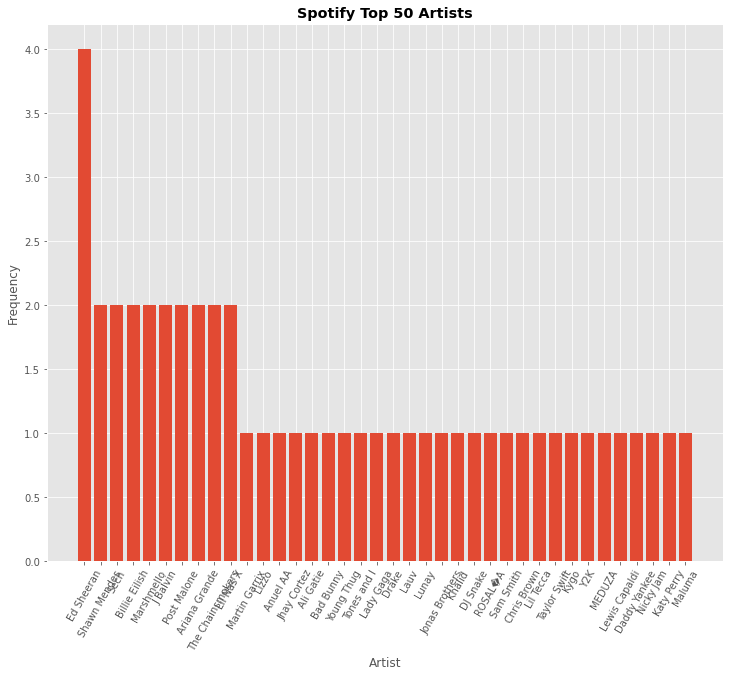

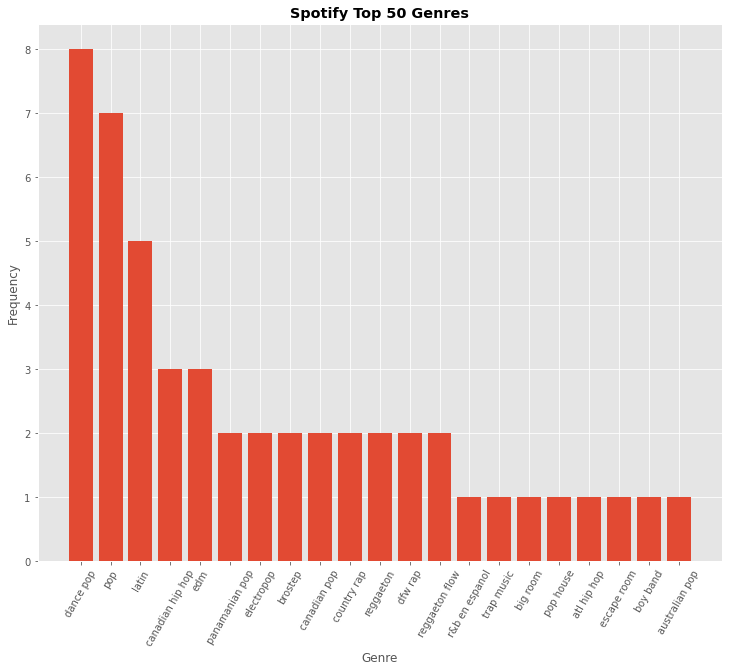

In [24]:
spotify_categorical = ['artist_name', 'genre']
for i in spotify_categorical:
    categorical_plot(i)

### 3.2: Numerical Columns 
- Since I'm not a fan of the the format of the column 'beats_per_minute' when outputting as the graph title, I utilized an if-statement to change the formatting

In [25]:
def numerical_plot(attribute):
    '''Create a plot for the numerical values of the dataset'''
    column_name = top50[attribute]
    
    plt.figure(figsize=(6,4.8))
    plt.hist(top50[attribute], bins = 50 )
    plt.tight_layout()
    
    if attribute == 'beats_per_minute':
        plt.title("Spotify Top 50 Beats per Minute Frequency", fontweight = "bold")
        plt.xlabel("Beats per Minute ")
    else:
        plt.title("Spotify Top 50 " + attribute.capitalize() + " Frequency", fontweight = "bold")
        plt.xlabel(attribute)
        
    plt.ylabel("Counts")
    plt.xticks(rotation = 90)
    plt.show()

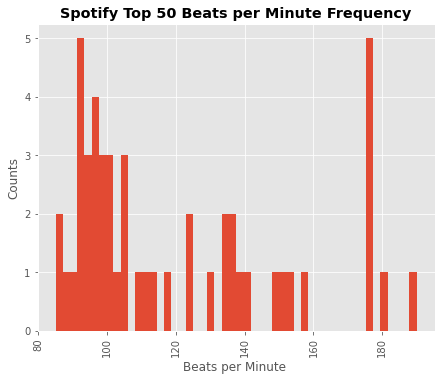

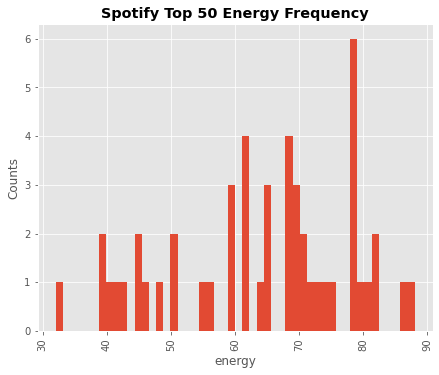

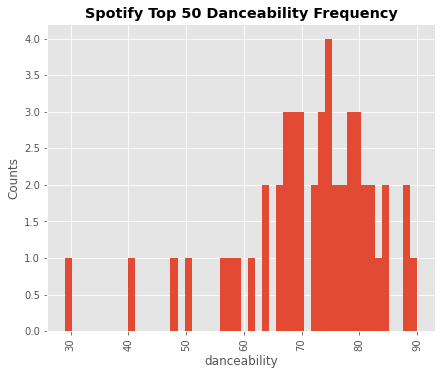

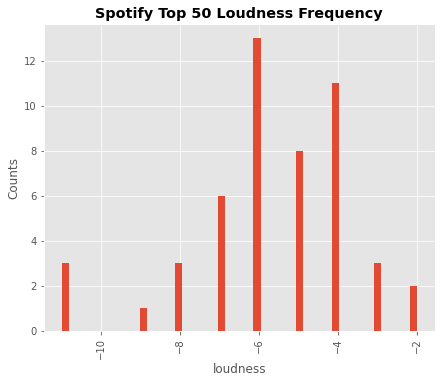

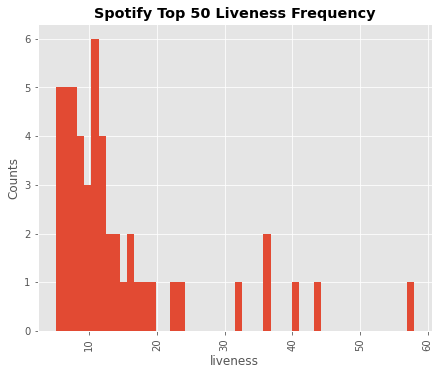

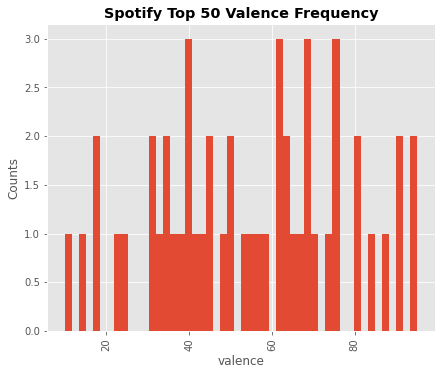

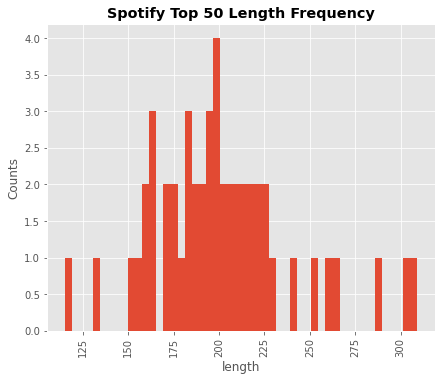

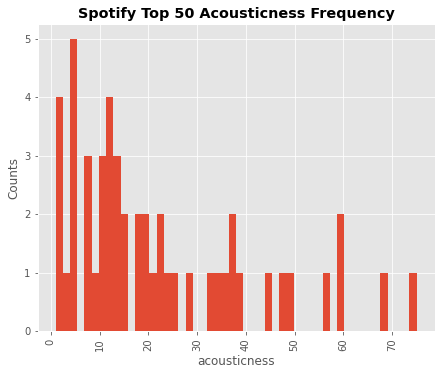

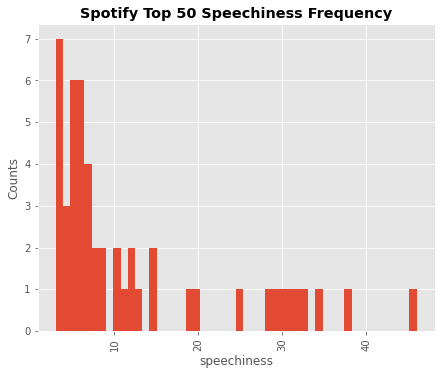

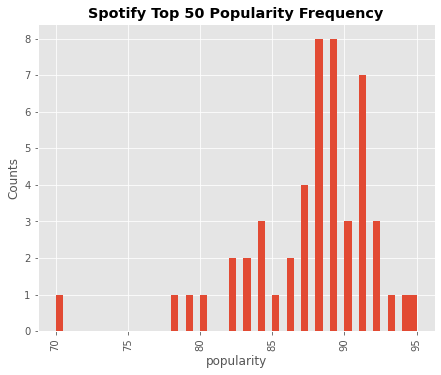

In [26]:
spotify_numerical = ["beats_per_minute","energy","danceability",
           "loudness","liveness","valence",
           "length","acousticness","speechiness","popularity"]

for i in spotify_numerical:
    numerical_plot(i)

## 3.3: Univariate Analysis

**Question 1:** What does the ditribution of the popularity for the respective songs look like? Is it skewed?

/Users/baraazekeria/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

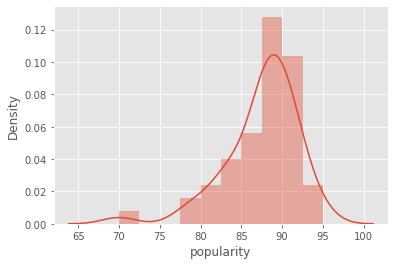

In [27]:
sns.distplot(top50['popularity'])

/Users/baraazekeria/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


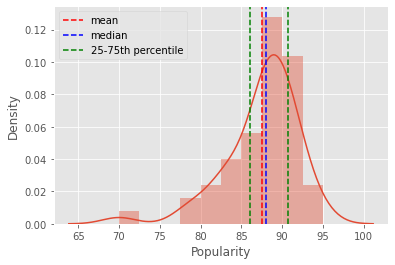

In [28]:
sns.distplot(top50['popularity'])
plt.axvline(x = np.mean(top50['popularity']), c = 'red', ls = '--', label = 'mean')
plt.axvline(x = np.median(top50['popularity']), c = 'blue', ls = '--', label = 'median')
#plt.axvline(x = np.mode(top50['popularity']), c = 'blue', ls = '--', label = 'mean')
plt.axvline(x = np.percentile(top50['popularity'], 25), c = 'green', ls = "--", label = '25-75th percentile')
plt.axvline(x = np.percentile(top50['popularity'], 75), c = 'green', ls = "--")
plt.xlabel("Popularity")
plt.legend()

How should I desrcibe a graph? 

*As my AP Statistics teacher once said, "CUSS & BS"!*

- **C**enter: mean, median, mode, etc.
- **U**nusual features: outliers, bimodal
- **S**hape
- **S**pread: range, IQR, standrad deviation, etc.

**CUSS @ your graphs and Be Specific**

As we can see from the graph above, the popularity of the respective Top 50 Songs from Spotify is skewed to the left with the mean and median being around 87 and 88 respectively. There seems to be an outlier at 70 with the peak being between 88-90. The data ranges from 70-95 inclusive. Majority of the data falls between 86-91 though 25% are above/below the stated range.

Let's check my predictions. From the graph, was I able to correctly identify the respective measures of spread?

In [29]:
top50['popularity'].min()

70

In [30]:
top50['popularity'].max()

95

In [31]:
top50['popularity'].mean()

87.5

Nice! I was pretty close for the mean, nonetheless on the right track

array([[<AxesSubplot:title={'center':'beats_per_minute'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'popularity'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

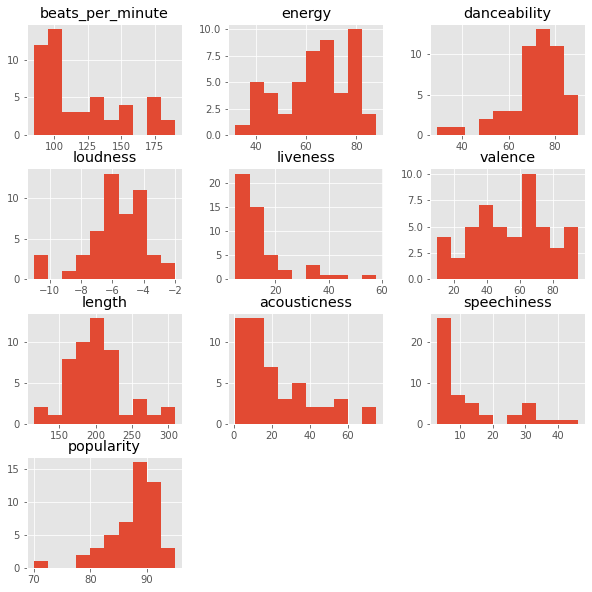

In [32]:
top50.hist(figsize = (10, 10))

### 3.3 Bivariate Analysis

**Question 2:** Do the amount of artist appearences differ by much between the artists?
- *Note:* Same analysis in 3.1 but somewhat of a different visualization 

Text(0.5, 1.0, "Spotify's Top 50 Artists")

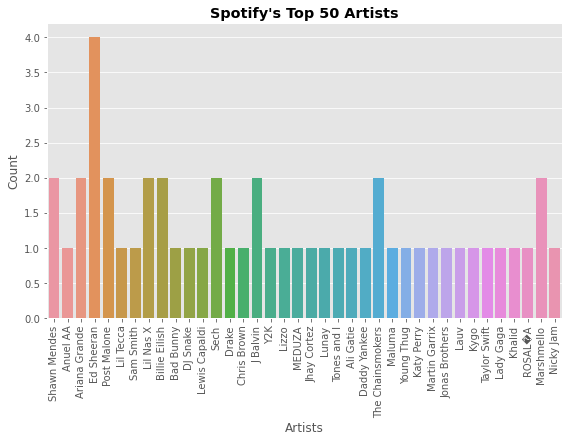

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'artist_name', data = top50)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.xlabel("Artists")
plt.ylabel("Count")
plt.title("Spotify's Top 50 Artists", fontweight = "bold")

## Task 4: Answer

### Top Artist by Popularity

In [34]:
top50[['artist_name', 'track_name','popularity']].sort_values(by='popularity',ascending=False).head(1)

,artist_name,track_name,popularity
9,Billie Eilish,bad guy,95
